## 16-1 introduction

- 나중에 혼자 설치할 때는 아래의 명령어를 사용
> $ pip install pillow opencv-python matplotlib  


### 학습 목표
- 컴퓨터에서 이미지가 표현되는 방식을 이해한다.
- Pillow와 OpenCV로 Python에서 이미지를 열고 정보를 추출할 수 있다.
- CIFAR-100에서 히스토그램 기반으로 유사 이미지를 골라낼 수 있다.

## 16-3 Pillow 사용법

- PIL이 있었는데, 개발 중단.
- 그 정신을 이어받은 게 Pillow
- 간단한 이미지 작업에는 Numpy array랑 결합해서 처리하기 쉬움

#### 이미지 생성해보기

- 결국 원하는 shape과 값으로 넘파이 어레이를 만들면 된다.
- 0~255 숫자가 들어가는데 타입은 uint8(unsigned, 즉 부호가 없는 8비트 정수)로 한다.

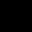

In [34]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image

In [35]:
test = np.random.randint(0, 255, 2500*3).reshape(50, 50, 3).astype(np.uint8)

<class 'PIL.Image.Image'>


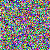

In [36]:
obj = Image.fromarray(test, 'RGB')
print(type(obj))
obj

> 주피터가 아닌 IDE 등의 개발 환경에서는 `.show()` method로 이미지 출력 가능

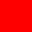

In [37]:
# 모든 색 빨간색으로 표시해보기

data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image

In [38]:
data[:, 0, 1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [39]:
data[:5, :5]
# 이미지 측면에서 shape은 (세로, 가로, 채널)이지만, numpy 입장에서 해석할 때는 (차원, 행, 열)이다.
# 즉 data[:, :]로 모든 차원에서 모든 행을 슬라이싱하면 '열'이 나오게 되는데,
# 이미지 측면에서 그 '열' 값은 채널(RGB) 각각의 값 3개이므로,
# 그 값을 바꾸면 이미지의 색깔이 바뀌게 된다.

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]], dtype=uint8)

#### 연습문제 1) 128 * 128 흰색 이미지 하나 만들어보기

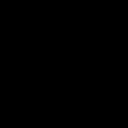

In [40]:
#- 문제 1 -# 
# [[YOUR CODE]]

prac_1 = np.zeros(128*128*3, dtype=np.uint8).reshape(128, 128, 3)
prac_1_img = Image.fromarray(prac_1, 'RGB')
prac_1_img

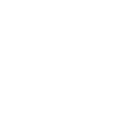

In [41]:
# 흰색으로 변경

prac_1[:, :] = [255, 255, 255]
prac_1_img_white = Image.fromarray(prac_1, 'RGB')
prac_1_img_white

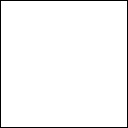

In [42]:
# 테두리 선 넣어보기
prac_1[:, :1]= [0, 0, 0] # 세로 전체, 가로는 첫번째만
prac_1[:, -1:]= [0, 0, 0] # 세로 전체, 가로는 마지막만
prac_1[:1, :]= [0, 0, 0] # 세로 첫번째만, 가로는 전체
prac_1[-1:, :]= [0, 0, 0] # 세로 마지막만, 가로는 전체

prac_1_img_rectangle = Image.fromarray(prac_1, 'RGB')
prac_1_img_rectangle

#### 연습문제 2) PIL을 통해 import 하고 width, height 출력 후 jpeg로 `.save()`하기

Width : 620
Hieght : 465


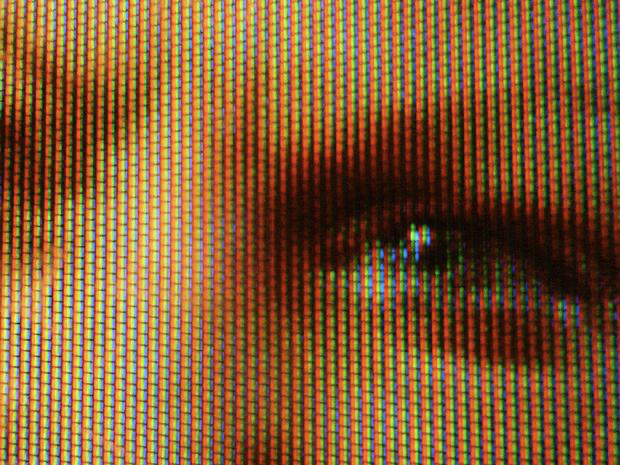

In [43]:
#- 문제 2 -#
from PIL import Image
import os

# 연습용 파일 경로
image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice.png'
save_jpg_path = os.getenv("HOME")+'/aiffel/python_image_proc/data/pillow_practice.jpg'

# 이미지 열기
# [[YOUR CODE]]
prac_2 = Image.open(image_path)
prac_2.show()

# width와 height 출력
# [[YOUR CODE]]
print("Width :", prac_2.width)
print("Hieght :", prac_2.height)

# JPG 파일 형식으로 저장해보기
# [[YOUR CODE]]
prac_2_rgb = prac_2.convert('RGB') # 'RGB'로 convert
prac_2_rgb.save(save_jpg_path)

# 열어서 확인해보기
prac_2_jpg = Image.open(save_jpg_path)
prac_2_jpg

#### 연습문제 3) `.resize()` 이용해서 100 * 200으로 바꾸고 저장하기

In [44]:
prac_2_resized = prac_2_jpg.resize((100, 200))

# path
resized_path = os.getenv("HOME") + '/aiffel/python_image_proc/data/pillow_practice_resized.jpg'
prac_2_resized.save(resized_path)

(100, 200, 3)


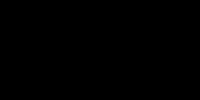

In [45]:

test_1 = np.zeros(100*200*3, dtype=np.uint8).reshape(100, 200, 3)
test_1_img = Image.fromarray(test_1, 'RGB')
print(test_1.shape)
test_1_img

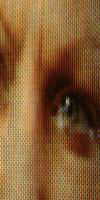

In [46]:
Image.open(resized_path)

#### 연습문제 4) `.crop`해서 눈만 가져 오기
- (힌트) 눈 부분의 box 좌표는 (300, 100, 600, 400)입니다.

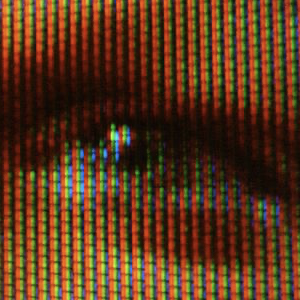

In [47]:
eye = prac_2_rgb.crop((300, 100, 600, 400))

eye_path = os.getenv("HOME") + '/aiffel/python_image_proc/data/eye.jpg'
eye.save(eye_path)
eye

## 16-4 Pillow를 이용한 이미지 전처리

- CIFAR-100 데이터셋 활용
- 32*32 이미지가 100개의 클래스에 각각 600장씩(500장 trian / 100장 test), 총 60,000장 있음
- pickle이란 형태로 저장되어 있음

In [48]:
import os
import pickle
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
print(train)   # 혹시 내용이 궁금하다면 주석을 풀고 실행해 보세요.

<class 'dict'>
{b'filenames': [b'bos_taurus_s_000507.png', b'stegosaurus_s_000125.png', b'mcintosh_s_000643.png', b'altar_boy_s_001435.png', b'cichlid_s_000031.png', b'phone_s_002161.png', b'car_train_s_000043.png', b'beaker_s_000604.png', b'fog_s_000397.png', b'rogue_elephant_s_000421.png', b'computer_keyboard_s_000757.png', b'willow_tree_s_000645.png', b'sunflower_s_000549.png', b'palace_s_000759.png', b'adriatic_s_001782.png', b'computer_keyboard_s_001277.png', b'bike_s_000682.png', b'wolf_pup_s_001323.png', b'squirrel_s_002467.png', b'sea_s_000678.png', b'shrew_s_002233.png', b'pine_tree_s_000087.png', b'rose_s_000373.png', b'surveillance_system_s_000769.png', b'pine_s_001533.png', b'table_s_000897.png', b'opossum_s_001237.png', b'quercus_alba_s_000257.png', b'leopard_s_000414.png', b'possum_s_002195.png', b'bike_s_000127.png', b'balmoral_castle_s_000361.png', b'acer_saccharinum_s_000646.png', b'lapin_s_000916.png', b'chimp_s_001419.png', b'clock_s_002291.png', b'streetcar_s_000663

In [49]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [50]:
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

> **특이사항은 문자열(str)이 bytes로 저장되어 있다.**

In [51]:
# label name 을 가져오기 위해 meta 파일 가져오기
meta_file_path = os.path.join(dir_path, 'meta')
meta = unpickle(meta_file_path)

In [52]:
meta.keys()

dict_keys([b'fine_label_names', b'coarse_label_names'])

In [53]:
meta

{b'fine_label_names': [b'apple',
  b'aquarium_fish',
  b'baby',
  b'bear',
  b'beaver',
  b'bed',
  b'bee',
  b'beetle',
  b'bicycle',
  b'bottle',
  b'bowl',
  b'boy',
  b'bridge',
  b'bus',
  b'butterfly',
  b'camel',
  b'can',
  b'castle',
  b'caterpillar',
  b'cattle',
  b'chair',
  b'chimpanzee',
  b'clock',
  b'cloud',
  b'cockroach',
  b'couch',
  b'crab',
  b'crocodile',
  b'cup',
  b'dinosaur',
  b'dolphin',
  b'elephant',
  b'flatfish',
  b'forest',
  b'fox',
  b'girl',
  b'hamster',
  b'house',
  b'kangaroo',
  b'keyboard',
  b'lamp',
  b'lawn_mower',
  b'leopard',
  b'lion',
  b'lizard',
  b'lobster',
  b'man',
  b'maple_tree',
  b'motorcycle',
  b'mountain',
  b'mouse',
  b'mushroom',
  b'oak_tree',
  b'orange',
  b'orchid',
  b'otter',
  b'palm_tree',
  b'pear',
  b'pickup_truck',
  b'pine_tree',
  b'plain',
  b'plate',
  b'poppy',
  b'porcupine',
  b'possum',
  b'rabbit',
  b'raccoon',
  b'ray',
  b'road',
  b'rocket',
  b'rose',
  b'sea',
  b'seal',
  b'shark',
  b'shre

In [54]:
type(train[b'filenames'])

list

In [55]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [56]:
# 이미지 데이터 찾기
print(train[b'data'].shape)
train[b'data']

(50000, 3072)


array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

> 3072를 `.reshape()`하면 (32,32,3) 형태의 이미지로 복구 가능


> 그러나 주의사항!  
3072바이트의 이미지 데이터는 앞 1024바이트는 빨강(R), 그다음 1024는 녹색(G), 마지막 1024는 파랑(B)으로 되어 있습니다.  
RGB 순서가 맞는 것은 다행이지만, 그렇다고 그냥 모양만 맞추어 reshape하면 안 됩니다.  
**1024를 32X32에 채우는 것을 3번 반복하는 방식의 reshape**이어야 합니다.  
이렇게 앞선 차원부터 데이터를 채우는 방식의 reshape를 위해 np.reshape에는 order라는 인자가 있습니다.  
이 값을 F로 주면 원하는 형태로 진행됩니다.

In [57]:
test = np.arange(30)
test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [58]:
test.reshape(2, 3, 5)

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [59]:
test.reshape([2, 3, 5], order='C')

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [60]:
test.reshape([2, 3, 5], order='F')

array([[[ 0,  6, 12, 18, 24],
        [ 2,  8, 14, 20, 26],
        [ 4, 10, 16, 22, 28]],

       [[ 1,  7, 13, 19, 25],
        [ 3,  9, 15, 21, 27],
        [ 5, 11, 17, 23, 29]]])

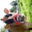

In [61]:
# reshape 진행
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image    # 화면에 띄워 봅시다!!

> x, y축이 바뀌어서 출력됐음

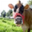

In [62]:
# x축, y축 바꿔주기
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

> x, y축이 바뀌는 이유를 생각해 보면...  
(32, 32, 3) Fortran-like로 원본 배열에 있는 일렬 숫자를 차례대로 가져 왔는데,  
이미지의 줄(row)에 해당하는 것을 맨 처음에 해당하는 차원(32)를 첫 기준으로 차례대로 가져 왔다.    
근데 생각해보면 반대로 두번째 32가 세로로 가게 된 셈인데,  
사실 이미지에서는 (가로, 세로)가 아니라 (세로, 가로)이다.  
어떻게 보면 우리가 생각하는 (32, 32, 3)의 모습은 똑바로된 정사각형 3개가 겹쳐진 것인데,  
컴퓨터 입장에서 그 이미지는 옆으로 누운(가로 <-> 세로가 바뀐) 게 3두께로 있는 것이다(그리고 이들은 두께로 나뉘는 게 아니라 세로 기준으로 나뉘게 된다)

In [63]:
# DJ's code
# 맨 밑의 3줄인데, 아닌 가보다

# import os
# import pickle
# from PIL import Image
# import numpy
# from tqdm import tqdm

# dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
# train_file_path = os.path.join(dir_path, 'train')

# # image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
# images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
# if not os.path.exists(images_dir_path):
#     os.mkdir(images_dir_path)  # images 디렉토리 생성

# # 32X32의 이미지 파일 50000개를 생성합니다. 
# with open(train_file_path, 'rb') as f:
#     train = pickle.load(f, encoding='bytes')
#     for i in tqdm(range(len(train[b'filenames']))):
#         # [[YOUR CODE]]
#####         saving_path = os.path.join(images_dir_path, f'train{i}.jpg')
#####         data = train[b'data'][i].reshape([32, 32, 3], order='F')
#####         data.swapaxex(0, 1).save(saving_path)

> 추가 되어야 하는 건,  
> 1) 어레이를 이미지로 바꿔야 하나보다 `Image.fromarray()` 사용  
> 2) 이름을 괜히 다 train0, train1, train2...로 할 뻔했다.  
> -> 차라리 filename에 있는 걸 그대로 가져와서 하면 되는데...  

In [64]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

100%|██████████| 50000/50000 [00:22<00:00, 2270.10it/s]


In [65]:
# 한번 내 코드로 하면 어떻게 되는지 확인하기

import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
test_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images-dj-test'
if not os.path.exists(test_dir_path):
    os.mkdir(test_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        # [[YOUR CODE]]
        saving_path = os.path.join(test_dir_path, f'train{i}.jpg')
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        data_1 = Image.fromarray(data.swapaxes(0, 1))
        data_1.save(saving_path)

100%|██████████| 50000/50000 [01:33<00:00, 534.02it/s]


> 뭔가 렉 걸려서 확인은 안되는데 50000장 다 된 것 같긴 하다...(이름이 train0, train1...인지 확인하고 싶다)

## 16-5 OpenCV

### Changing Colorspaces 해보기
- 특정 부분이 특정 색깔만 갖고 있다면, 그 부분만 떼어내보기

#### 연습문제) 일단 돌려놓기

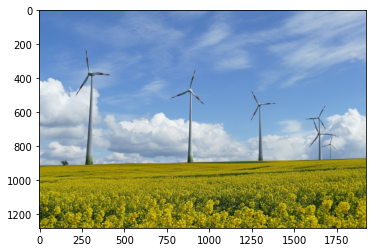

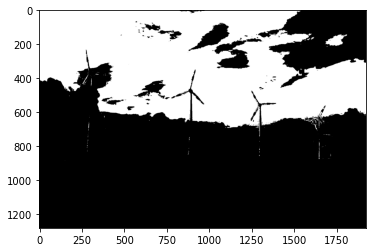

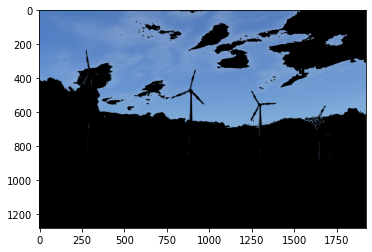

In [67]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

## 16-6. OpenCV (2) 톺아보기

- cv.inRange
- cv.bitwise_and
쓰는 법 알면 됨

## 16-7 실습 : 비슷한 이미지 찾아내기

- CIFAR-100 이미지 중에
- 이미지 어레이의 색상 값을 히스토그램으로 해서 비슷한 이미지 찾기
  - 이 때 0~255 256개 전부 하면 계산이 많아지니까 구간을 4개로 나눠서 하기
  - 그리고 RGB 채널 3개이니까 각 채널별 분포를 확인해야 함

In [68]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

#### 색상별 히스토그램 그리는 함수 정의

In [69]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

> `PIL.Image.open()`은 이미지 출력 및 PIL....ImageFile 타입을 갖고, `cv2.imread()`는 ndarray를 반환한다.

In [73]:
type(Image.open(image_path))

PIL.PngImagePlugin.PngImageFile

In [72]:
cv2.imread(image_path)

array([[[ 54, 145, 232],
        [ 61, 163, 218],
        [ 83, 196, 185],
        ...,
        [ 82,  38,  80],
        [ 73,  58, 158],
        [ 67,  69, 200]],

       [[ 58, 154, 243],
        [ 67, 172, 228],
        [ 87, 203, 193],
        ...,
        [ 94,  50,  90],
        [ 79,  62, 161],
        [ 68,  68, 197]],

       [[ 59, 158, 243],
        [ 68, 176, 235],
        [ 85, 205, 197],
        ...,
        [101,  57,  92],
        [ 83,  62, 157],
        [ 68,  65, 191]],

       ...,

       [[ 52, 131, 229],
        [ 62, 155, 227],
        [ 79, 197, 213],
        ...,
        [ 25,  84,  42],
        [ 29,  55,  38],
        [ 44,  42,  42]],

       [[ 54, 135, 230],
        [ 66, 160, 230],
        [ 82, 200, 215],
        ...,
        [ 21,  79,  37],
        [ 28,  52,  33],
        [ 39,  37,  36]],

       [[ 51, 134, 231],
        [ 63, 164, 230],
        [ 74, 203, 208],
        ...,
        [ 16,  74,  38],
        [ 19,  45,  33],
        [ 32,  36,  40]]

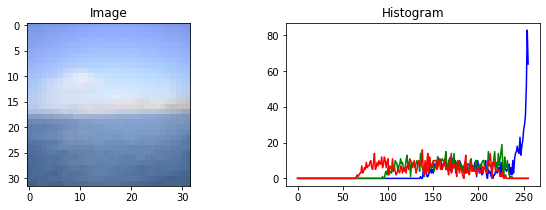

In [70]:
# 예제 파일 확인

draw_color_histogram_from_image('adriatic_s_001807.png')

> 파란색이 눈에 띄고, 255에 가까운 파란색스런 값이 많다는 걸 알 수 있다.

#### 이미지당 채널별 히스토그램을 1차원 넘파이 어레이로 변환해주는 함수 정의

In [74]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        # [[YOUR CODE]]
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)
    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [75]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

#### build_histogram_db() 구현
- 이미지 이름을 key로 하고, 히스토그램 값을 value로

In [78]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    # [[YOUR CODE]]
    for filename in tqdm(file_list):
        file_path = os.path.join(path, filename)
        image = cv2.imread(file_path)
        histogram = get_histogram(image)
        histogram_db[filename] = histogram
    # 이미지 가져오기
    # 이미지 histogram 함수에 넣기
    # 딕셔너리[key] histogram 함수 값 할당
    
    
    return histogram_db

In [79]:
# 함수 확인
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [00:06<00:00, 7234.32it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [83]:
len(histogram_db.keys())

49999

In [85]:
histogram_db

{'rainbow_trout_s_000590.png': array([[0.3554778 ],
        [0.33813742],
        [0.2601057 ],
        [0.03275405],
        [0.33524737],
        [0.34873432],
        [0.26781255],
        [0.03468076],
        [0.5558555 ],
        [0.12234602],
        [0.23216844],
        [0.07610501]], dtype=float32),
 'power_mower_s_000129.png': array([[0.04013778],
        [0.0184239 ],
        [0.04079578],
        [0.5744309 ],
        [0.04013778],
        [0.0184239 ],
        [0.04145377],
        [0.57377285],
        [0.03947978],
        [0.01973989],
        [0.04013778],
        [0.5744309 ]], dtype=float32),
 'wood_s_000379.png': array([[0.42564648],
        [0.43212372],
        [0.08235335],
        [0.00740255],
        [0.1101129 ],
        [0.4506301 ],
        [0.27667022],
        [0.1101129 ],
        [0.0703242 ],
        [0.34884506],
        [0.4302731 ],
        [0.09808376]], dtype=float32),
 'halibut_s_000669.png': array([[0.10744019],
        [0.3750076 ],
        [0

#### 원하는 이미지 파일명 넣어서 타겟으로 잡고, 그 타겟의 히스토그램 반환하는 함수 만들기

In [84]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [86]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: power_mower_s_000129.png


array([[0.04013778],
       [0.0184239 ],
       [0.04079578],
       [0.5744309 ],
       [0.04013778],
       [0.0184239 ],
       [0.04145377],
       [0.57377285],
       [0.03947978],
       [0.01973989],
       [0.04013778],
       [0.5744309 ]], dtype=float32)

In [97]:
# DJ's practice
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.
    # [[YOUR CODE]]
    scores = []
    for file_name in histogram_db:
        file_name_score = cv2.compareHist(target_histogram, histogram_db[file_name], 0)
        scores.append((file_name, file_name_score))
        
    results = sorted(scores, key=lambda x: x[1], reverse=True)
    results = results[:top_k]
    results = dict(results)
    # histogram_db values 중
    # target_historgram과 비슷한 거 순위매기기
    # 기준 잡는 법은 compareHist()
    # 순위대로 order 잡기
    # value로 키를 찾기
    return results

In [102]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}
    
    for file_name, histogram in histogram_db.items():
        score = cv2.compareHist(target_histogram, histogram, cv2.HISTCMP_CHISQR)
        results[file_name] = score
        
    results = dict(sorted(results.items(), key=lambda x: x[1])[:top_k])
    return results

In [103]:
result = search(histogram_db, target_histogram)
result

{'power_mower_s_000129.png': 0.0,
 'lamp_s_001103.png': 0.011445685431618039,
 'roach_s_001027.png': 0.013468104711786858,
 'cockroach_s_002273.png': 0.01578056637420392,
 'oriental_cockroach_s_000261.png': 0.019134387265856288}

> 제일 첫번째로 오는 건 당연히 자기 자신(target_histogram)

####  results 5개 이미지를 출력하는 함수 만들기

In [106]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        # [[YOUR CODE]]
        ax = f.add_subplot(1,5, idx+1)
        file_path = os.path.join(images_dir_path, filename)
        img = Image.open(file_path)
        ax.imshow(img)
        ax.set_title(filename)

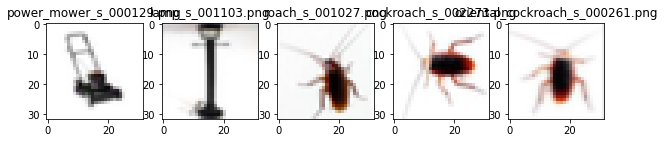

In [107]:
show_result(result)

#### 함수 합체
- target_histogram()으로 타겟 받기
- search()로 비슷한 것들 찾기
- show_result()로 이미지화하기

이미지 파일명을 입력하세요: halibut_s_000669.png


100%|██████████| 49999/49999 [00:06<00:00, 7311.51it/s]


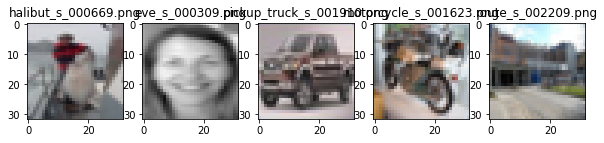

In [110]:
target_histogram = get_target_histogram()
histogram_db = build_histogram_db()
top_5 = search(histogram_db, target_histogram)
show_result(top_5)

In [99]:
lis = []
t = np.arange(4).reshape(4,-1)
t2 = t.copy()
lis.append(t)
lis.append(t2)
lis

[array([[0],
        [1],
        [2],
        [3]]),
 array([[0],
        [1],
        [2],
        [3]])]

In [77]:
histogram.shape

(12, 1)

In [74]:
len(range(3))

3

### # Changing Colorspaces tutorial

https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html

In [64]:
# Colorspace 종류 및 conversion 종류 확인

import cv2 as cv
flag = [ i for i in dir(cv) if i.startswith('COLOR_')]
print(flag)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

> For HSV, hue range is [0,179], saturation range is [0,255], and value range is [0,255]. Different software use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.


#### Object tracking
- by extracting a coloured object

In [66]:
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break


error: OpenCV(4.5.1) /tmp/pip-req-build-hj027r8z/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [70]:
import cv2

blue = np.array([[[0, 0, 255]]], dtype=np.uint8)
print(blue.shape)
blue_hsv = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(blue_hsv)

(1, 1, 3)
[[[  0 255 255]]]
